<a href="https://colab.research.google.com/github/habteg97/Loan_risk_analysis/blob/main/loan_risk_analaysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Loan Risk Assessment


# Project Objectives:
*     Analyze the factors that impact the loan status most.  
*     Analyze how likely the loan would be defaulted given different features.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
loan_df = pd.read_csv('/content/gdrive/MyDrive/Thinkful/Projects/Project_by_Python/credit_risk_dataset.csv')

## copy the dataFrame to keep the original intact

In [ ]:
loan_df2 = loan_df.copy()


## Initial exploration
- Understand dataset
    - how many rows/columns?
    - what does a row represent?
    - what is our target variable?
- Check for missing values
- Check data types
- Check for issues in target variable
- Investigate initial relationships and distributions

## What do I have

In [ ]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


## Target variable:
    y = loan_status

In [ ]:
loan_df2['loan_status']

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

## Descriptive statistics

In [ ]:
loan_df2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Issues with person_age and person_emp_length
### Assumptions:
* person_age has to be not older than 100: drop, if any, older than 100.
* person_emp_length has to be not more than 80 to give sense: drop, if any, greater than 80.

In [ ]:
# ages > 100 or person employment length >80--> to be dropped
loan_df_to_be_dropped =  loan_df2[(loan_df2['person_emp_length']>80) | (loan_df2['person_age']>100)]
loan_df_to_be_dropped.shape

(7, 11)

### Dropping ages >100 and employment length  > 80

In [ ]:
loan_df_assumption = loan_df2.drop(loan_df_to_be_dropped.index)
loan_df_assumption.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.782064,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,4.034948,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Missing values

In [ ]:
loan_df_assumption.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## filling missing values:

### fill nulls of `person_emp_length` and `loan_int_rate` by .mean() of the corresponding column

In [ ]:
loan_df_assumption = loan_df_assumption.fillna({'person_emp_length':loan_df_assumption['person_emp_length'].mean(), 'loan_int_rate':loan_df_assumption['loan_int_rate'].mean()})

### Check to see if the missing values are filled

In [ ]:
loan_df_assumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_amnt                   32574 non-null  int64  
 6   loan_int_rate               32574 non-null  float64
 7   loan_status                 32574 non-null  int64  
 8   loan_percent_income         32574 non-null  float64
 9   cb_person_default_on_file   32574 non-null  object 
 10  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.0+ MB


### index before resetting

In [ ]:
loan_df_assumption.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


# Resetting Index:
    Use: df.reset_index(drop = True) method

In [ ]:
loan_df_assumption = loan_df_assumption.reset_index(drop =  True)

In [ ]:
# New index
loan_df_assumption.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


---

# Hypothesis 1:
$H_0$: `The average age of loan borrowers` who defaulted and who didn't are not different.

$H_a$: `The average age of loan borrowers` who defaulted and who didn't are significantly different.



## Frequency distribution of the borrowers age

<Axes: xlabel='person_age', ylabel='Count'>

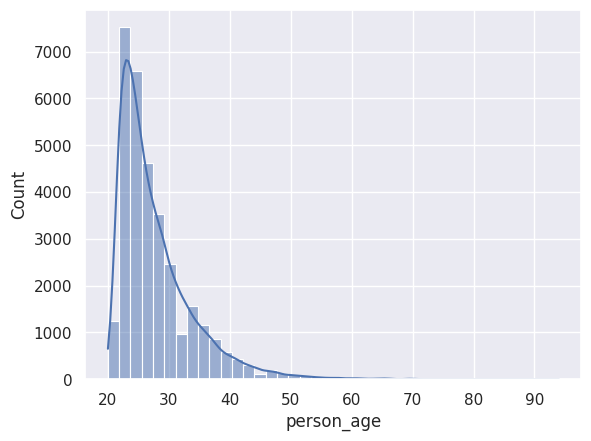

In [ ]:
sns.histplot(loan_df_assumption['person_age'], bins = 40, kde=True)

## Grouping into `defaulted` and `non_defaulted`

In [ ]:
defaulted_loan_df = loan_df_assumption[loan_df_assumption['loan_status'] == 1]
non_defaulted_loan_df = loan_df_assumption[loan_df_assumption['loan_status'] == 0]

### count of defaulted loans

In [ ]:
defaulted_loan_df.shape[0]

7107

### count of non_defaulted loans

In [ ]:
non_defaulted_loan_df.shape[0]

25467

### non_defaulted average person age

In [ ]:
non_defaulted_loan_df['person_age'].mean()

27.786233164487374

### defaulted average person age

In [ ]:
defaulted_loan_df['person_age'].mean()

27.475446742648092

## import t_test statistics library

In [ ]:
from scipy.stats.stats import ttest_ind
from scipy.stats import stats

### Independent two_samples t-test

In [ ]:
ttest_ind(defaulted_loan_df['person_age'], non_defaulted_loan_df['person_age'])

Ttest_indResult(statistic=-3.73425447873653, pvalue=0.00018859263075426995)

## Summary of findings for hypothesis 1:

The t-test shows that there is a significant difference between person_ages who defaulted and who didn't. This means that older ages who borrowed loans would not be defaulted compared to younger ages. **Hypothesis rejected.**

---

# Hypothesis 2:
 __Hypothesis:__ `Loan amount` and `person income` for `defaulted loans` are correlated.


### Scatter plot of `loan_amnt` vs `person_income`

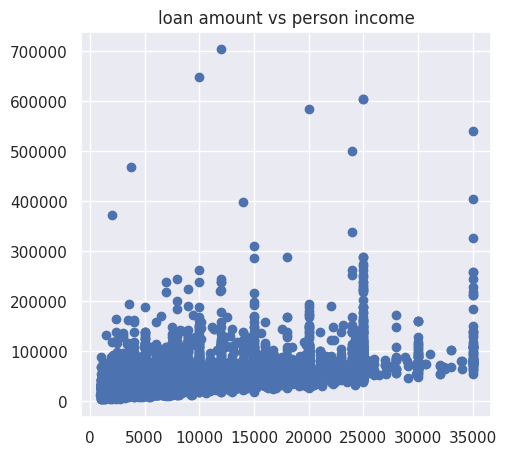

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(defaulted_loan_df["loan_amnt"], defaulted_loan_df["person_income"])
plt.title("loan amount vs person income")


plt.show()

### Pearson correlation coeffient with p-value

In [ ]:
stats.pearsonr(defaulted_loan_df["loan_amnt"], defaulted_loan_df["person_income"])

PearsonRResult(statistic=0.42769743927442233, pvalue=4.5188264797e-314)

## Summary of findings for hypothesis 2:

A Pearson correlation coefficient of 0.43 indicates a **`moderate positive relationship`** between the `loan amount` and `person income` of defaulted loans. since th P-value < 0.05, the correlation is statisticallly significant. That means as one variable increases, the other tends to increase as well.**Hypothesis supported.**

__Risk Assessment__: if the two variables are considered to be factors for credit risk, knowing that they are positively correlated could help lenders identify borrowers who are more likely to default on loans or have higher credit risk. This information might be used to adjust `lending criteria` or set `credit limits` accordingly.
    
    

---

In [ ]:
loan_df_assumption.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
loan_df_assumption[['person_home_ownership','loan_intent']].nunique()

person_home_ownership    4
loan_intent              6
dtype: int64

# The classification model/logistic regression
# Data partition: train/test

In [ ]:
# Use sklearn to import model_selection: train_test_split
from sklearn.model_selection import train_test_split

##  ML steps
1. Partition data into training and testing sets FIRST!
2. With Training data:

  ### Prepare target variable:
          
  ### Prepare features:
    
      **Categorical Data**:
        - extract categorical columns
        - create dummy variables for categorical columns
        - add dummy column names to `DataFrame`
       
      **Numeric Data**:
        - extract numeric columns
        - imput missing values
        - standardize values
        
      **Boolean Data**:
        - extract boolean columns
        - impute missing values
        - create to `True` and `False` values
       
      

### Prepare feature variables:

#### Extracting categorical, numerical, and boolean columns

In [ ]:
## Making list of features to use them in the model

# Categorical columns
cat_cols = ['person_home_ownership', 'loan_intent']

# numerical columns
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# boolean column
bool_col = ['cb_person_default_on_file']

#### convert bool 'Y' or 'N' to 1 or 0

In [ ]:
def convert_bools(df):
    map_dict = {'Y': 1.0, 'N': 0.0}
    df = df.replace(map_dict)
    return df

In [ ]:
loan_df_0_1_bool = convert_bools(loan_df_assumption)

#### introduce dummy variables for the cat_cols


In [ ]:
loan_df_dummies = pd.get_dummies(loan_df_0_1_bool, columns = cat_cols, drop_first = True, prefix = ['HO','LI'])

In [ ]:
# identify target variable and independent variables and split them into train and test

X = loan_df_dummies.drop('loan_status',axis = 1)
y = loan_df_dummies['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10) # random _state controls shuffling process

## The model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from matplotlib import pyplot

In [ ]:
# LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Prediction
y_pred = log_reg_model.predict(X_test)


In [ ]:
y_pred_proba = log_reg_model.predict_proba(X_test)
y_pred_proba

array([[0.85604738, 0.14395262],
       [0.87741095, 0.12258905],
       [0.72175816, 0.27824184],
       ...,
       [0.77492656, 0.22507344],
       [0.69667674, 0.30332326],
       [0.94266609, 0.05733391]])

# Model Performance

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", round(acc*100))

Logistic Regression model accuracy (in %): 81


### Classification Report

In [ ]:
# all features
print(classification_report(y_test,y_pred, target_names = ['Non_defaulted_loan','Defaulted_loan']))

                    precision    recall  f1-score   support

Non_defaulted_loan       0.81      0.98      0.89      5120
    Defaulted_loan       0.74      0.16      0.27      1395

          accuracy                           0.81      6515
         macro avg       0.78      0.57      0.58      6515
      weighted avg       0.80      0.81      0.76      6515



#### confusion_matrix

In [ ]:
con_mat = confusion_matrix(y_test,y_pred)
print('precision: %.2f' % (con_mat[1][1]/(con_mat[1][1]+con_mat[0][1])))

precision: 0.74


#### Roc_curve

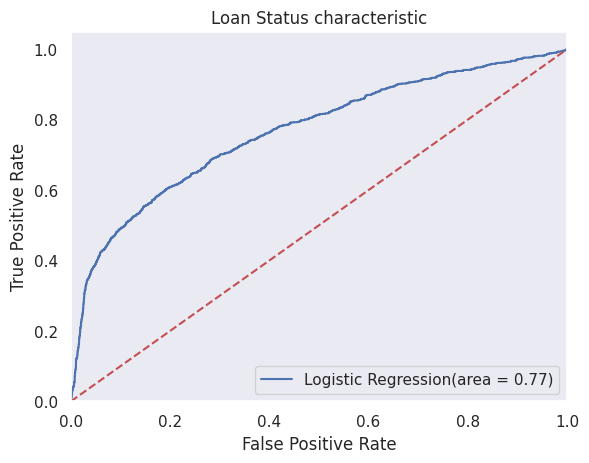

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logit_roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:,1])

#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = "Logistic Regression(area = %.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Loan Status characteristic')
plt.legend(loc = 'lower right')
plt.grid()
plt.show();

### Feature important
    refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature: person_age, Score: -0.0
Feature: person_income, Score: -4e-05
Feature: person_emp_length, Score: -0.0
Feature: loan_amnt, Score: 0.0001
Feature: loan_int_rate, Score: 0.0
Feature: loan_percent_income, Score: 0.0
Feature: cb_person_default_on_file, Score: 0.0
Feature: cb_person_cred_hist_length, Score: -0.0
Feature: HO_OTHER, Score: 0.0
Feature: HO_OWN, Score: -0.0
Feature: HO_RENT, Score: 0.0
Feature: LI_EDUCATION, Score: -0.0
Feature: LI_HOMEIMPROVEMENT, Score: 0.0
Feature: LI_MEDICAL, Score: 0.0
Feature: LI_PERSONAL, Score: -0.0
Feature: LI_VENTURE, Score: -0.0


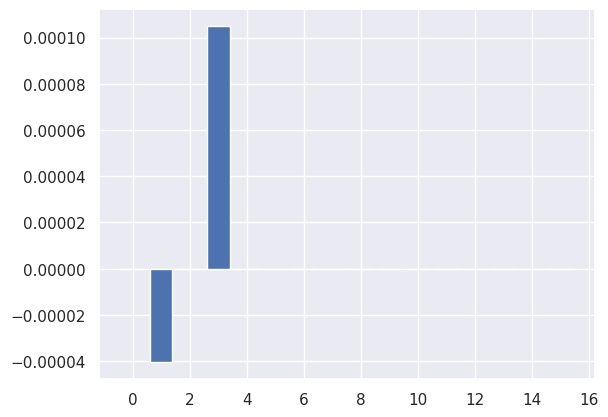

In [ ]:
# get importance
importance = log_reg_model.coef_[0]

# summarize feature importance
for feat,important in zip(X.columns,importance):
    print('Feature: {}, Score: {}' .format(feat,round(important,5)))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Interprete:
The positive scores indicate a feature that predicts class 1(loan defaulted), whereas the negative scores indicate a feature that predicts class 0(non_defaulted loan).

Therefore, high loan amount would highly predict the loan status to be defaulted. and the higher person income predicts a non-defaulted loan.
